***Note: this is the Chloroplast.ipynb notebook. The
PDF version "The Chloroplast Electron Transport Chain"
is available [here](Chloroplast.pdf).***

*This is a work in progress and needs more explanatory notes.*

In [1]:
## Some useful imports
import BondGraphTools as bgt
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Stoichiometric analysis
import stoich as st

## SVG bg representation conversion
import svgBondGraph as sbg

## Modular bond graphs
import modularBondGraph as mbg

## Display (eg disp.SVG(), disp.
import IPython.display as disp

## Data
import phiData
import redoxData


# Introduction
Photosynthesis within plant chloroplasts is the basis of life on earth <cite data-cite="Bla14">(Blankenship 2014)</cite>, <cite data-cite="NicFer13">(Nichols and Ferguson, 2013)</cite>.

Like the mitochondrion, the chloroplast has a membrane seperating an inner space (lumen) from an outer space (stroma). In the chloroplast, the lumen gains protons and is called the p-space, the stroma looses protons and is called the n-space.
Thus geometrically, the lumen corresponds to the mitochondrial matrix and the stroma to the mitochondrial intermembrane space; but electrically the p-space is inside and the n-space outside - the reverse of the mitochondrial situation.

The chloroplast electron transport chain has 4 complexes.

1. Photosystem II (PII) which absorbs photons at 680nm and splits water releasing protons into the p-space and passing electrons to the plastoquinone(PQ)/plastoquine(PQH2) couple which absorbs protons from the n-space.

2. Cytochrome bf (Cyt) which passes electrons to the plastoquine/plastoquinone couple which releases two protons into the p-space. Electrons are passed to the plastocyanine couple (PcOx/PcRed). Two protons are pumped across the membrane.

3. Photosystem I (PI) which absorbs photons at 700nm and transports electrons from the plastocyanine (PcRed/PcOx) couple to the ferredoxin (FdOx/FdRed) couple.

4. Feredoxin-NADP reductase which transfers electrons from the ferredoxin (FdRed/FdOx) couple to convert NADP to NADPH absorbing a proton from the n-space.

The following figure is: https://commons.wikimedia.org/wiki/File:Thylakoid_membrane_3.svg



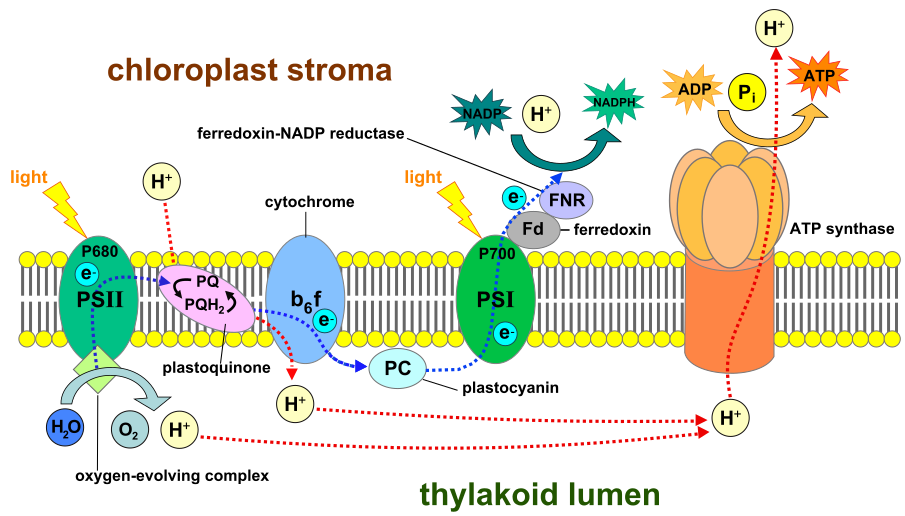

In [2]:
# https://commons.wikimedia.org/wiki/File:Thylakoid_membrane_3.svg
disp.SVG("Thylakoid_membrane_3.svg") 

# Photon Energetics

\begin{align}
    \phi_{photon} &= \frac{N_{av}hc}{F\lambda}\\
    \text{where } N_{av} &= \text{Avogadro's number}\\
    h &= \text{Planck's constant}\\
    c &= \text{velocity of light}\\
    F &= \text{Faraday's constant}\\
    \text{and } \lambda &= \text{wavelength}
\end{align}
For example:
\begin{equation}
\phi_{photon}  = 
\begin{cases}
   1.82 V & \lambda = 680 nm\\
   1.77 V & \lambda = 700 nm
 \end{cases}
\end{equation}

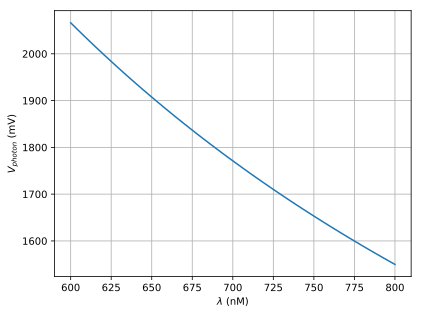

In [3]:
disp.SVG('V_photon.svg')

# Redox reactions

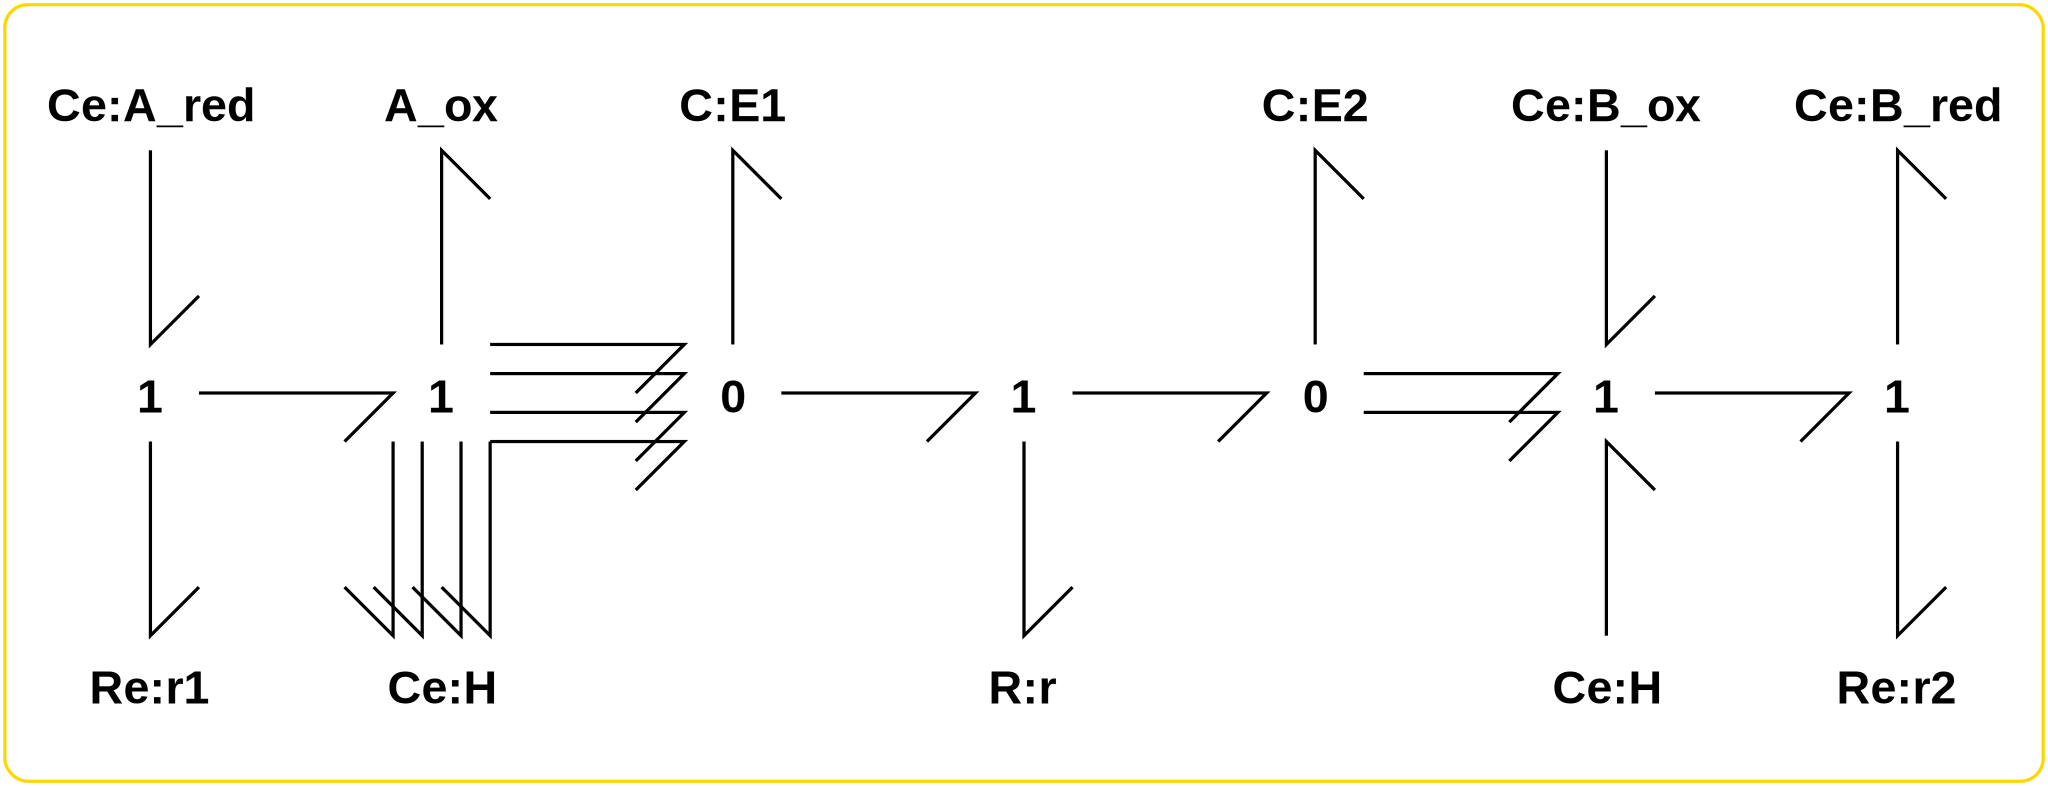

In [4]:
disp.SVG('Redox_abg.svg')

Redox reactions can be written as two half-reactions:

\begin{align}
\ch{A_{red} &<>[ r1 ] n_1 e_1^- + m_1 H_1^+ +  A_{ox}}\\
\ch{B_{ox} + n_2 e_2^- + m_2 H_2^+ &<>[ r2 ] B_{red}}
\end{align}


## Redox potentials

Note that photon energies have been used for V_700 and V_680; this value is too large as the energy conversion is not direct. A model of this needs to be built. See, for example:
<cite data-cite="BlaPri85">(Blankenship and Prince, 1985)</cite>


In [5]:
import redoxData
## pH from BerTymStr 19.3
pH_p = 4 # pH of p-space
pH_n = pH_p + 3
VpH = redoxData.VpH(pH_p - pH_n)
V680 = redoxData.V_photon(wavelength=680)
V700 = redoxData.V_photon(wavelength=700)
print(VpH)
print('V_pH =',int(1000*VpH),'mV')
print('V_680 =',int(1000*V680),'mV')
print('V_700 =',int(1000*V700),'mV')



0.18462115653058278
V_pH = 184 mV
V_680 = 1823 mV
V_700 = 1771 mV


In [6]:
## Convert redox potentials to species phi
phi_redox = redoxData.phi()
phi_redox['Hn'] = redoxData.VpH(pH_n)
phi_redox['Hp'] = redoxData.VpH(pH_p)

## The correct photon potentials need sorting out
## The raw valyes used here are an overestimate. See BlaPri85
phi_redox['P680'] = V680
phi_redox['P700'] = V700
#phi_redox['P680'] = phi_redox['P680+']
#phi_redox['P700'] = phi_redox['P700+']

## The membrane potential is said by some to be zero. (check this)
phi_redox['dV'] = VpH

# Bond graph description
The four complexes are represented by svg graphics which are automatically converted into BondGraphTools format.

The stoichiometric toolbox is then used to generate the pathway-reduced equation for the complex.
 

## Complex PII -- Photosystem II 

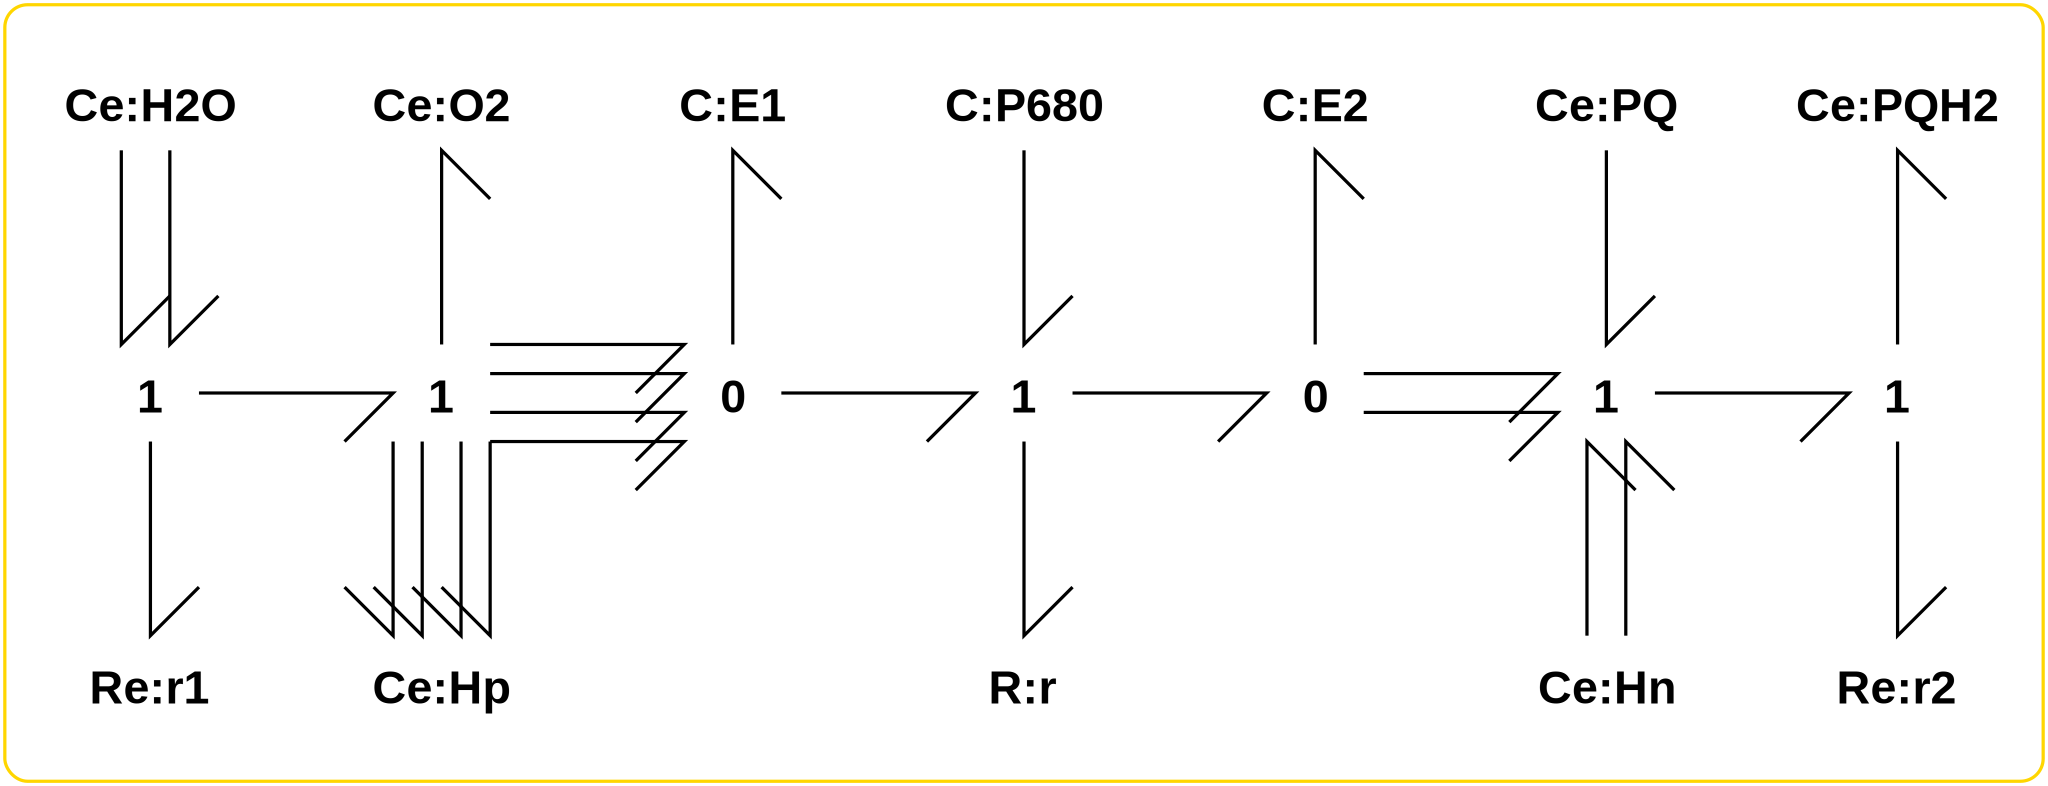

In [7]:
disp.SVG('PII_abg.svg')

In [8]:
sbg.model('PII_abg.svg',convertR=True,convertCe=True,quiet=True)
import PII_abg

In [9]:
## Stoichiometry
sPII = st.stoich(PII_abg.model(),quiet=True)
chemostats = ['H2O','O2','PQ','PQH2','Hn','Hp','P680']
scPII = st.statify(sPII,chemostats=chemostats)
spPII = st.path(sPII,scPII)
## All reactions
disp.Latex(st.sprintrl(sPII,chemformula=True))

<IPython.core.display.Latex object>

In [10]:
## Pathway reaction
disp.Latex(st.sprintrl(spPII,chemformula=True))

<IPython.core.display.Latex object>

In [11]:
## Compute net redox potential
RP_PII = (
            - redoxData.EpH('O2/2H2O',pH=pH_p)
            + V680
            + redoxData.EpH('PQ/PQH2',pH=pH_n)
         )

print(redoxData.EpH('O2/2H2O',pH=pH_p))
print(redoxData.E('P680+/P680*'))
print(redoxData.E7('PQ/PQH2'))
print(redoxData.EpH('PQ/PQH2',pH=pH_n))
#print(RP_PII)
print('RP_PII =',int(1000*RP_PII), 'mV')

1.0006211565305827
0.8
0
0.0
RP_PII = 822 mV


In [12]:
## Compute the reaction potential Phi
phi = phiData.phi_species(phi_redox,spPII['species'])
Phi_PII_ = -spPII['N'].T@phi
Phi_PII = Phi_PII_[0][0]
print('Phi_PII =',int(1000*Phi_PII), 'mV')
print('Ratio =',(Phi_PII/RP_PII))

Phi_PII = 3290 mV
Ratio = 4.0


## Complex Cyt -- Cytochrome bf

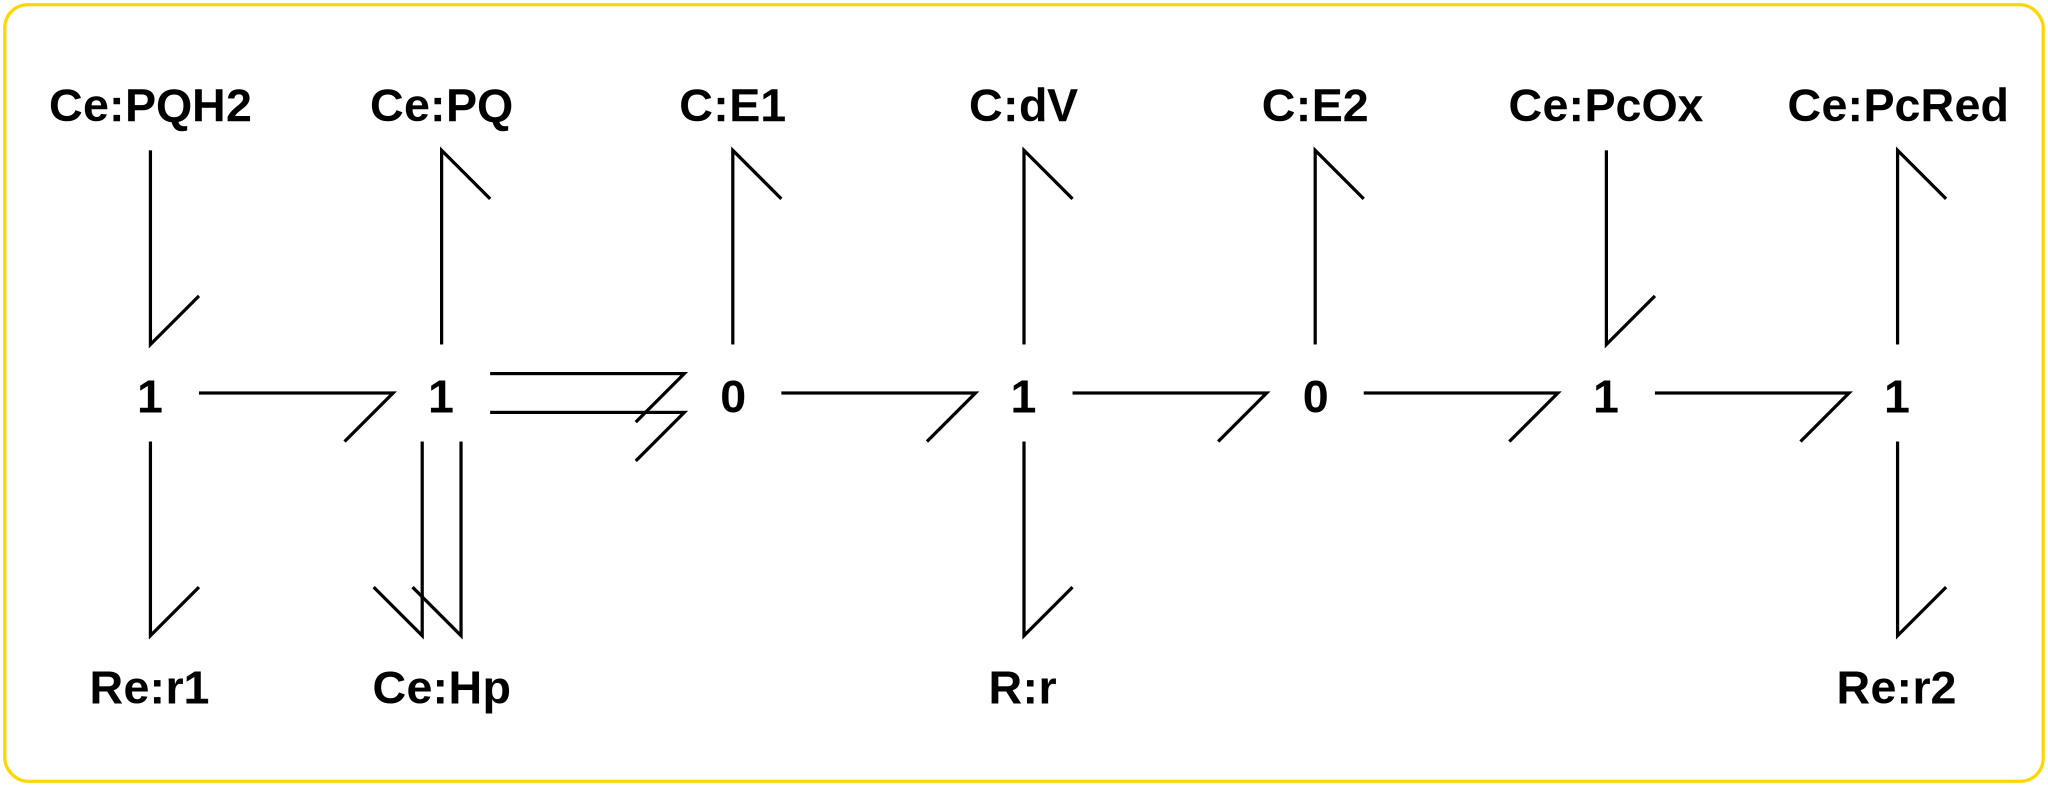

In [13]:
disp.SVG('Cyt_abg.svg')

In [14]:
sbg.model('Cyt_abg.svg',convertR=True,convertCe=True,quiet=True)
import Cyt_abg

In [15]:
## Stoichiometry
sCyt = st.stoich(Cyt_abg.model(),quiet=True)
chemostats = ['PQ','PQH2','PcOx','PcRed','Hp','dV']
scCyt = st.statify(sCyt,chemostats=chemostats)
spCyt = st.path(sCyt,scCyt)
disp.Latex(st.sprintrl(sCyt,chemformula=True))

<IPython.core.display.Latex object>

In [16]:
disp.Latex(st.sprintrl(spCyt,chemformula=True))

<IPython.core.display.Latex object>

In [17]:
## Compute net redox potential
RP_Cyt = (- redoxData.EpH('PQ/PQH2',pH=pH_p)
          - redoxData.VpH(pH_p - pH_n)
          + redoxData.E('PcOx/PcRed')
         )

print(RP_Cyt)
print('RP_Cyt =',redoxData.mV(RP_Cyt), 'mV')

0.010757686938834443
RP_Cyt = 11 mV


In [18]:
## Compute the reaction potential Phi
phi = phiData.phi_species(phi_redox,spCyt['species'])
Phi_Cyt_ = -spCyt['N'].T@phi
Phi_Cyt = Phi_Cyt_[0][0]
print('Phi_Cyt =',redoxData.mV(Phi_Cyt), 'mV')
print('Ratio =', int(Phi_Cyt/RP_Cyt))

Phi_Cyt = 22 mV
Ratio = 2


## Complex PI -- Photosystem I

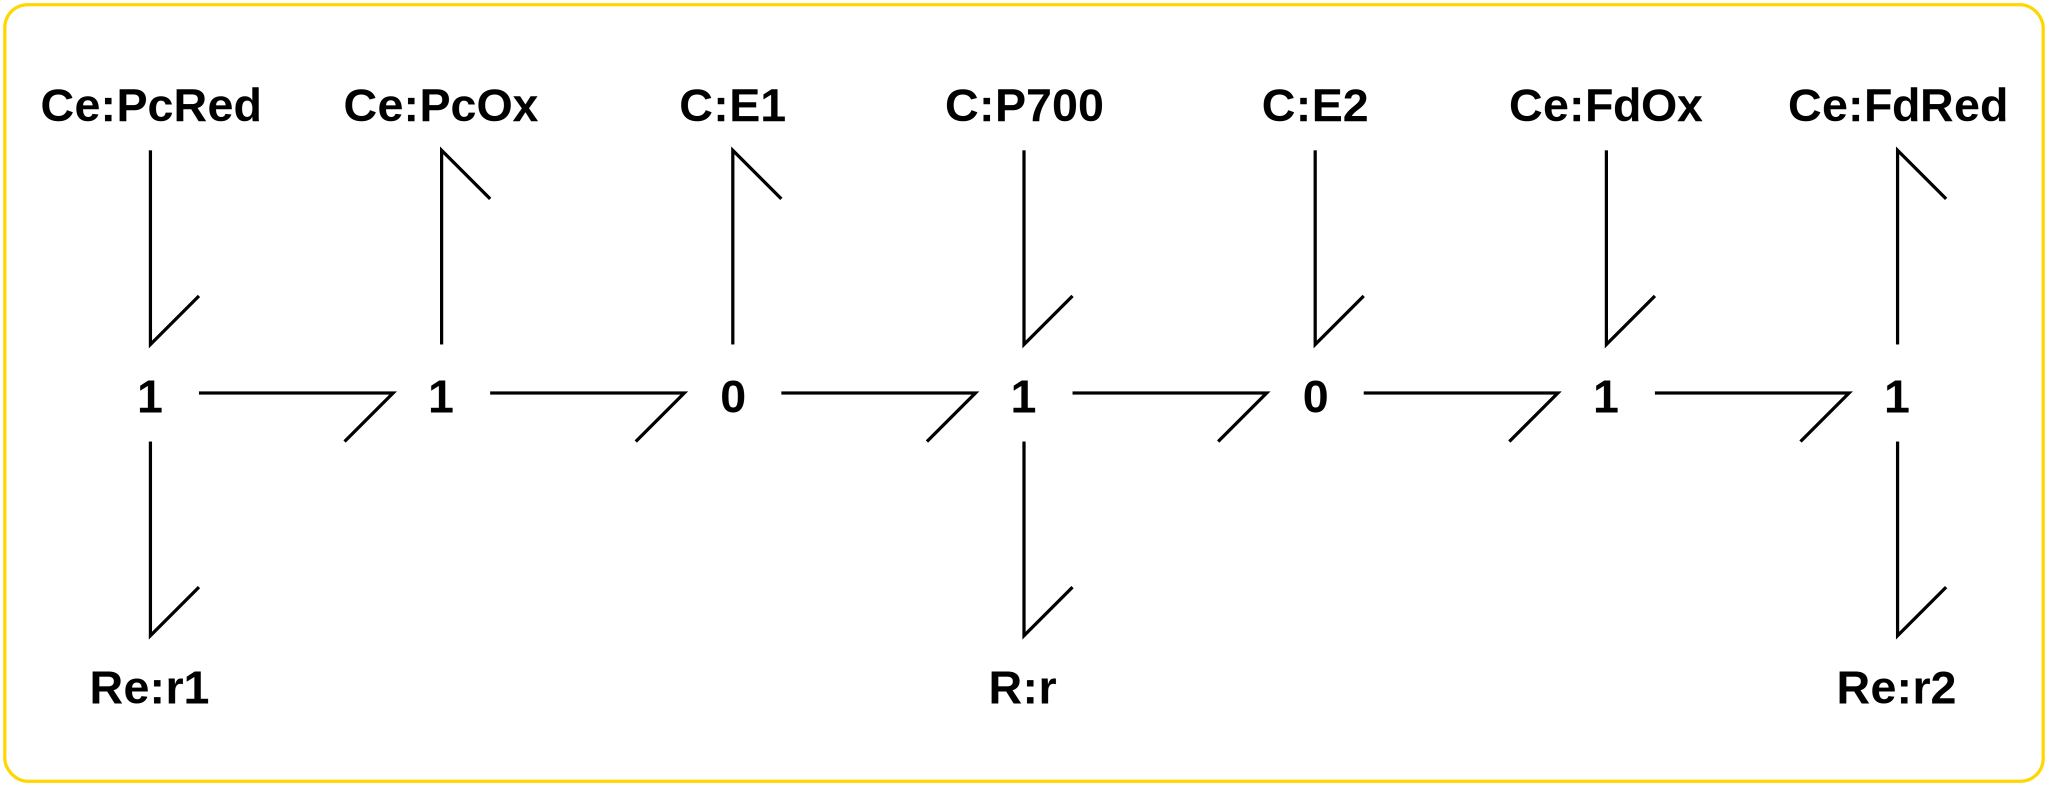

In [19]:
disp.SVG('PI_abg.svg')

In [20]:
sbg.model('PI_abg.svg',convertR=True,convertCe=True,quiet=True)
import PI_abg

In [21]:
## Stoichiometry
sPI = st.stoich(PI_abg.model(),quiet=True)
chemostats = ['PcOx','PcRed','FdOx','FdRed','P700']
scPI = st.statify(sPI,chemostats=chemostats)
spPI = st.path(sPI,scPI)
disp.Latex(st.sprintrl(sPI,chemformula=True))

<IPython.core.display.Latex object>

In [22]:
disp.Latex(st.sprintrl(spPI,chemformula=True))

<IPython.core.display.Latex object>

In [23]:
## Compute net redox potential
RP_PI = (
        - redoxData.E('PcOx/PcRed')
        + V700
        + redoxData.E('FdOx/FdRed')
        )

#print(RP_PI)
print('RP_PI =',redoxData.mV(RP_PI), 'mV')

RP_PI = 961 mV


In [24]:
## Compute the reaction potential Phi
phi = phiData.phi_species(phi_redox,spPI['species'])
Phi_PI_ = -spPI['N'].T@phi
Phi_PI = Phi_PI_[0][0]
print('Phi_PI =',redoxData.mV(Phi_PI), 'mV')
print('Ratio =', int(round(Phi_PI/RP_PI)))

Phi_PI = 961 mV
Ratio = 1


## Complex Fer -- Feredoxin-NADP reductase

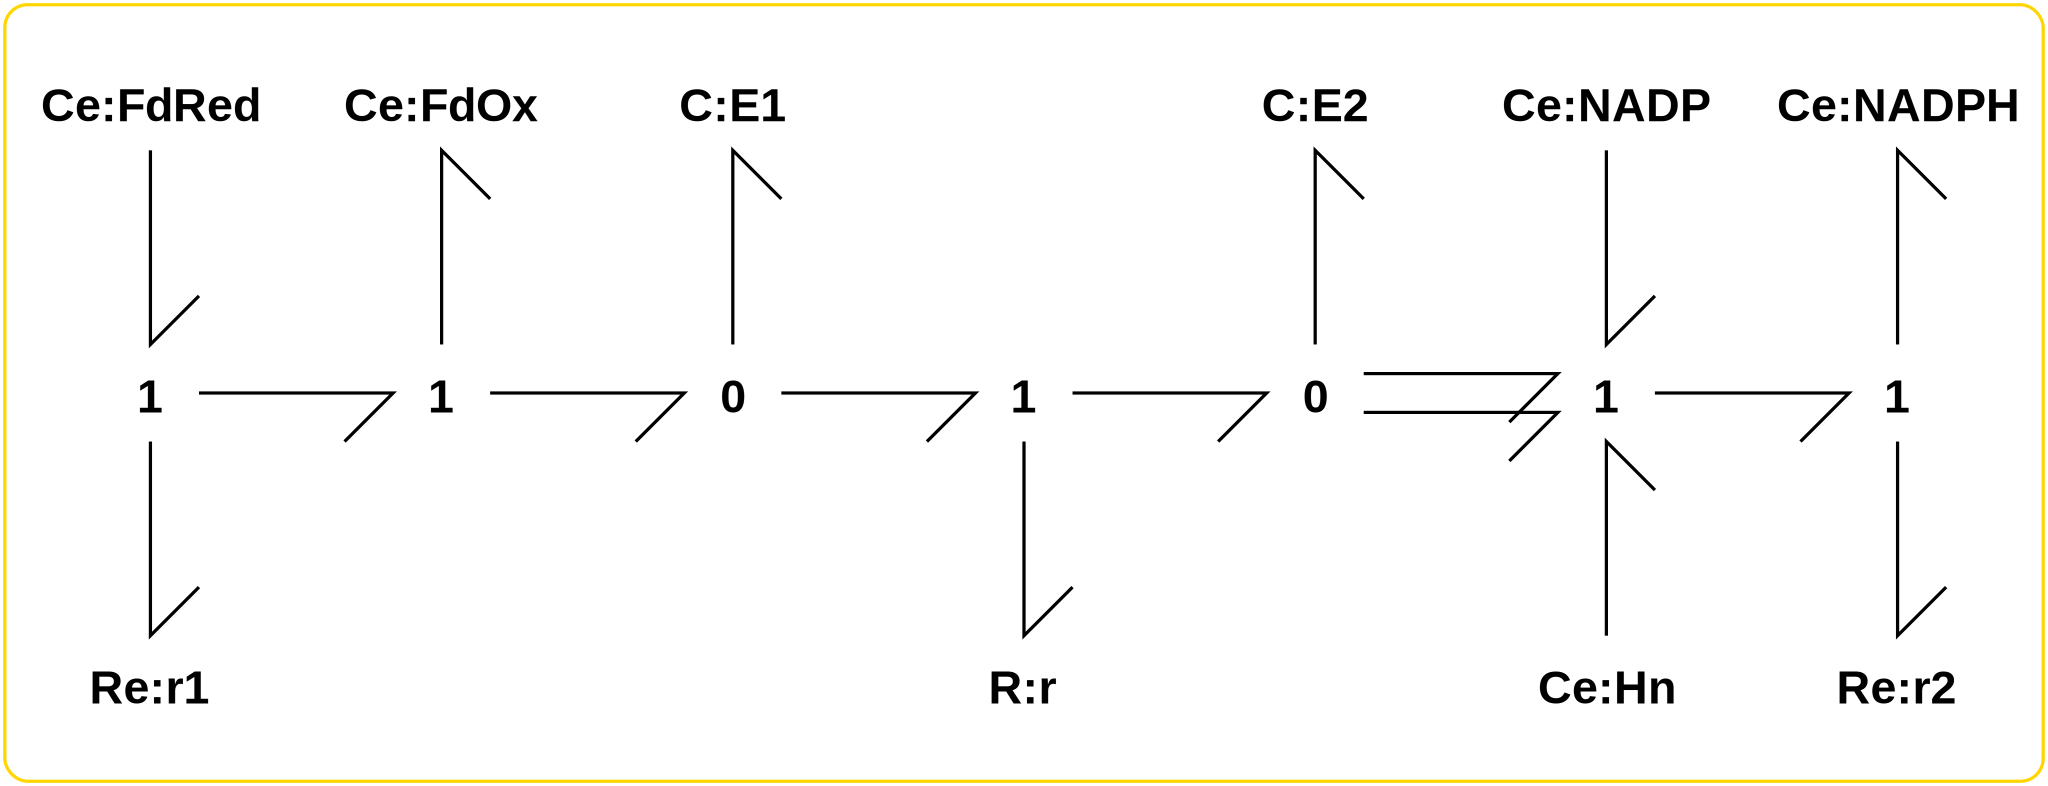

In [25]:
disp.SVG('Fer_abg.svg')

In [26]:
sbg.model('Fer_abg.svg',convertR=True,convertCe=True,quiet=True)
import Fer_abg

In [27]:
## Stoichiometry
sFer = st.stoich(Fer_abg.model())
chemostats = ['FdRed','FdOx','NADP','NADPH','Hn']
scFer = st.stoich(Fer_abg.model(),chemostats=chemostats)
spFer = st.path(sFer,scFer)
disp.Latex(st.sprintrl(sFer,chemformula=True))

Swapping Re:r for two Sf in Fer
Swapping Re:r1 for two Sf in Fer
Swapping Re:r2 for two Sf in Fer
Swapping Re:r for two Sf in Fer
Swapping Re:r1 for two Sf in Fer
Swapping Re:r2 for two Sf in Fer


<IPython.core.display.Latex object>

In [28]:
disp.Latex(st.sprintrl(spFer,chemformula=True))

<IPython.core.display.Latex object>

In [29]:
## Compute net redox potential
RP_Fer = (
        - redoxData.E('FdOx/FdRed')
        + redoxData.EpH('NADP/NADPH',pH_n)
        )

#print(RP_Fer)
print('RP_Fer =',int(1000*RP_Fer), 'mV')

RP_Fer = 105 mV


In [30]:
## Compute the reaction potential Phi
phi = phiData.phi_species(phi_redox,spFer['species'])
Phi_Fer_ = -spFer['N'].T@phi
Phi_Fer = Phi_Fer_[0][0]
print('Phi_Fer =',int(1000*Phi_Fer), 'mV')
print('Ratio =', int(Phi_Fer/RP_Fer))

Phi_Fer = 212 mV
Ratio = 2


# The Electron Transport Chain
The overall model is described a bond graph tools file:

In [31]:
## File ETC_abg.py

import BondGraphTools as bgt
import PII_abg
import Cyt_abg
import PI_abg
import Fer_abg

def model():
    """ 
    Model of chloroplast electron transport chain
    """

    ETC = bgt.new(name='ETC')   # Create system
    PII = PII_abg.model()
    Cyt = Cyt_abg.model()
    PI = PI_abg.model()
    Fer = Fer_abg.model()
    bgt.add(ETC,PII,Cyt,PI,Fer)
    
    return ETC


## Unify species in model using mbg.unify()

In [32]:
import ETC_abg
model = ETC_abg.model()
common = ['PQ','PQH2','PcOx','PcRed','FdOx', 'FdRed','Hn','Hp']
mbg.unify(model,common,quiet=True)
s = st.stoich(model,quiet=True)

In [33]:
chemostats = ['H2O','O2','NADP','NADPH','Hp','Hn','P680','P700','dV']
sc = st.statify(s,chemostats=chemostats)
sp = st.path(s,sc)
disp.Latex(st.sprintrl(sp,chemformula=True))

<IPython.core.display.Latex object>

In [34]:
## Compute the reaction potential Phi
phi = phiData.phi_species(phi_redox,sp['species'])
Phi_ = -sp['N'].T@phi
Phi= Phi_[0][0]
print('Phi =',redoxData.mV(Phi), 'mV')


Phi = 7603 mV
